In [147]:
# Importing the necessary libraries
import pandas as pd

# Loading the datase
file_path = '/Users/tanyasharan/Downloads/simulated_fake_transactions_dataset_2.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print(data.head())

         Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2025     00:00  839964633.0   3385.0  2602.0                     NaN   
1  01/01/2025     00:00  793069740.0   3318.0  2780.0                     NaN   
2  01/01/2025     00:00  793069740.0   2278.0 -1040.0             705519819.0   
3  01/01/2025     00:00  705519819.0   2726.0  1040.0             793069740.0   
4  01/01/2025     00:00  726302171.0   3253.5  1542.5                     NaN   

     Third Party Name  
0               Boots  
1  Mountain Warehouse  
2                 NaN  
3                 NaN  
4          Craftastic  


In [148]:
# Dropping rows where 'Account No', 'Balance', and 'Amount' are all NaN
data = data.dropna(subset=['Account No', 'Balance', 'Amount'], how='all')

# Displaying the first few rows to check the changes
print(data.head())

         Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2025     00:00  839964633.0   3385.0  2602.0                     NaN   
1  01/01/2025     00:00  793069740.0   3318.0  2780.0                     NaN   
2  01/01/2025     00:00  793069740.0   2278.0 -1040.0             705519819.0   
3  01/01/2025     00:00  705519819.0   2726.0  1040.0             793069740.0   
4  01/01/2025     00:00  726302171.0   3253.5  1542.5                     NaN   

     Third Party Name  
0               Boots  
1  Mountain Warehouse  
2                 NaN  
3                 NaN  
4          Craftastic  


In [149]:
# Converting 'Account No' to integer type. 
data['Third Party Account No'] = data['Third Party Account No'].astype('Int64') 

# Merging 'Date' and 'Timestamp' columns into a single 'DateTime' column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'], format='%d/%m/%Y %H:%M')

# Converting 'DateTime' column to the desired format: '%d/%m/%Y %H:%M'
data['DateTime'] = data['DateTime'].dt.strftime('%d/%m/%Y %H:%M')

# Dropping the original 'Date' and 'Timestamp' columns
data = data.drop(['Date', 'Timestamp'], axis=1)

# Displaying the first few rows to check the changes
print(data.head())

    Account No  Balance  Amount  Third Party Account No    Third Party Name  \
0  839964633.0   3385.0  2602.0                    <NA>               Boots   
1  793069740.0   3318.0  2780.0                    <NA>  Mountain Warehouse   
2  793069740.0   2278.0 -1040.0               705519819                 NaN   
3  705519819.0   2726.0  1040.0               793069740                 NaN   
4  726302171.0   3253.5  1542.5                    <NA>          Craftastic   

           DateTime  
0  01/01/2025 00:00  
1  01/01/2025 00:00  
2  01/01/2025 00:00  
3  01/01/2025 00:00  
4  01/01/2025 00:00  


In [150]:
# Converting 'Account No' to integer type. 
data['Account No'] = data['Account No'].astype('Int64') 
#'Third Party Account No' to string type
data['Third Party Account No'] = data['Third Party Account No'].astype('string') 
# Filling empty (NaN) values in 'Third Party Account No' with 'Merchant'
data['Third Party Account No'] = data['Third Party Account No'].fillna('MTrx')
# Filling empty (NaN) values in 'Third Party Name' with 'Peer-to-Peer Payment'
data['Third Party Name'] = data['Third Party Name'].fillna('P2P')
# Filling rows where both 'Third Party Account No' and 'Third Party Name' are empty (NaN) with 'Unknown'
data.loc[data['Third Party Account No'].isna() & data['Third Party Name'].isna(), ['Third Party Account No', 'Third Party Name']] = 'Unknown'

# Rounding off 'Balance' to two decimal places
data['Balance'] = data['Balance'].round(2)

# Displaying the first few rows to check the changes
print(data.head())

   Account No  Balance  Amount Third Party Account No    Third Party Name  \
0   839964633   3385.0  2602.0                   MTrx               Boots   
1   793069740   3318.0  2780.0                   MTrx  Mountain Warehouse   
2   793069740   2278.0 -1040.0              705519819                 P2P   
3   705519819   2726.0  1040.0              793069740                 P2P   
4   726302171   3253.5  1542.5                   MTrx          Craftastic   

           DateTime  
0  01/01/2025 00:00  
1  01/01/2025 00:00  
2  01/01/2025 00:00  
3  01/01/2025 00:00  
4  01/01/2025 00:00  


In [151]:
# Dropping duplicate rows
data = data.drop_duplicates()
# Saving the changes to a new CSV file
data.to_csv('/Users/tanyasharan/Downloads/cleaned_dataset2.csv', index=False)

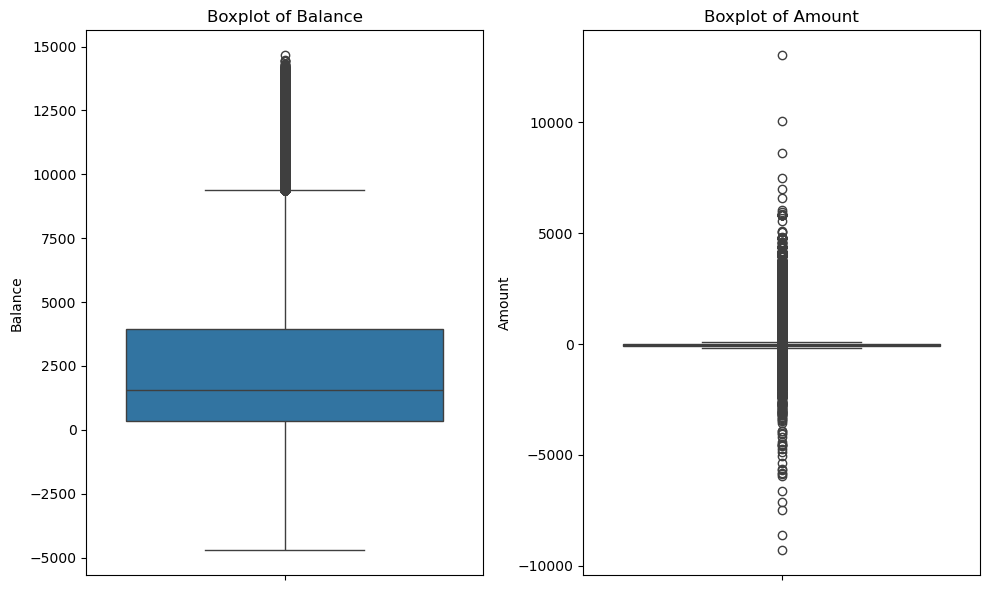

In [97]:
# Visualising Outliers. 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# List of numeric columns to check for outliers (adjust as needed)
numeric_columns = ['Balance', 'Amount']  # Add more columns as needed

# Create boxplots for each numeric column
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [113]:
# Identifying rows where 'Balance' is negative
overdraft = data[data['Balance'] < 0]
# Flagging overdraft accounts as 1 for overdraft and 0 for non-overdraft
data['Overdraft Flag'] = data['Balance'].apply(lambda x: 1 if x < 0 else 0)

# Displaying the rows with the new 'Overdraft Flag' column
print(data[['Account No', 'Balance', 'Overdraft Flag']].head())

   Account No  Balance  Overdraft Flag
0   839964633   3385.0               0
1   793069740   3318.0               0
2   793069740   2278.0               0
3   705519819   2726.0               0
4   726302171   3253.5               0


In [115]:
from datetime import timedelta
# Step 2: Ensure the 'DateTime' column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d/%m/%Y %H:%M')

# Step 3: Flagging overdraft incidents (where Balance < 0)
data['Overdraft Flag'] = data['Balance'].apply(lambda x: 1 if x < 0 else 0)

# Step 4: Filter records within the last 6 months

# Find the most recent date in the dataset
max_date = data['DateTime'].max()  
# Get the date 6 months ago
six_months_ago = max_date - timedelta(days=180)  
recent_data = data[data['DateTime'] >= six_months_ago]

# Step 5: Count the frequency of overdraft incidents for each account in the last 6 months
overdraft_frequency = recent_data.groupby('Account No')['Overdraft Flag'].sum()

# Step 6: Classify customers based on overdraft frequency
def overdraft_classification(frequency):
    if frequency >= 5:
        return 'Frequent Overdrafters'
    elif frequency > 0:
        return 'Occasional Overdrafters'
    else:
        return 'Non-Overdrafters'

# Apply the classification to the overdraft frequency
data['Overdraft Classification'] = data['Account No'].map(overdraft_frequency).apply(overdraft_classification)

# Step 7: Classify overdraft amounts based on the 'Balance'
def overdraft_amount_classification(balance):
    if balance < -2000:
        return 'Large Overdraft'
    elif balance < -500:
        return 'Medium Overdraft'
    elif balance < 0:  # Any negative balance less than -500 will be classified as 'Small Overdraft'
        return 'Small Overdraft'
    else:
        return 'No Overdraft'

# Apply the classification to the overdraft amount
data['Overdraft Amount Classification'] = data['Balance'].apply(overdraft_amount_classification)

# Step 8: Final output with the overdraft classifications
print(data[['Account No', 'Balance', 'DateTime', 'Overdraft Flag', 'Overdraft Classification', 'Overdraft Amount Classification']].head())



   Account No  Balance   DateTime  Overdraft Flag Overdraft Classification  \
0   839964633   3385.0 2025-01-01               0         Non-Overdrafters   
1   793069740   3318.0 2025-01-01               0         Non-Overdrafters   
2   793069740   2278.0 2025-01-01               0         Non-Overdrafters   
3   705519819   2726.0 2025-01-01               0    Frequent Overdrafters   
4   726302171   3253.5 2025-01-01               0    Frequent Overdrafters   

  Overdraft Amount Classification  
0                    No Overdraft  
1                    No Overdraft  
2                    No Overdraft  
3                    No Overdraft  
4                    No Overdraft  


In [116]:
print(data[data['Account No'] == 705519819])

        Account No  Balance   Amount Third Party Account No Third Party Name  \
3        705519819  2726.00  1040.00            793069740.0              P2P   
1253     705519819  2626.00  -100.00                   MTrx  Grand Union BJJ   
6214     705519819  2449.72  -176.28                   MTrx       Coop Local   
7181     705519819  2226.22  -223.50                   MTrx             Next   
7235     705519819  2002.72  -223.50                   MTrx          Topshop   
...            ...      ...      ...                    ...              ...   
264867   705519819  -510.60  -203.95                   MTrx       Coop Local   
271967   705519819  -678.24  -167.64                   MTrx       Coop Local   
275695   705519819   361.76  1040.00            793069740.0              P2P   
279994   705519819   261.76  -100.00                   MTrx  Grand Union BJJ   
285415   705519819    57.07  -204.69                   MTrx       Coop Local   

                  DateTime  Overdraft F

In [117]:
from datetime import timedelta

# Assuming the 'DateTime' column is in datetime format
six_months_ago = data['DateTime'].max() - timedelta(days=180)  # 6 months ago from the most recent date in the dataset

# Filter for account '705519819' and the last 6 months
account_data = data[(data['Account No'] == 705519819) & (data['DateTime'] >= six_months_ago)]

# Count the overdraft incidents (where Overdraft Flag is 1)
overdraft_count = account_data['Overdraft Flag'].sum()

print(f"Account 705519819 was flagged as overdraft {overdraft_count} times in the last 6 months.")


Account 705519819 was flagged as overdraft 28 times in the last 6 months.
